# Proyek Pertama : Membuat Model NLP dengan TensorFlow

### Nama : Reza Fauzi Baharsyah
Dataset yang digunakan:
https://www.kaggle.com/datasets/sankha1998/tmdb-top-10000-popular-movies-dataset

Berikut kriteria submission yang harus Anda penuhi:

* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
* Harus menggunakan LSTM dalam arsitektur model.
* Harus menggunakan model sequential.
* Validation set sebesar 20% dari total dataset.
* Harus menggunakan Embedding.
* Harus menggunakan fungsi tokenizer.
* Akurasi dari model minimal 75% pada train set dan validation set.

In [1]:
# Import Library dan convert Dataset ke Data Frame menggunakan Open Data Set
!pip install -q opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/sankha1998/tmdb-top-10000-popular-movies-dataset') # insert kaggle  username and token key

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rezafbaharsyah
Your Kaggle Key: ··········


100%|██████████| 1.31M/1.31M [00:00<00:00, 58.1MB/s]

In [2]:
import pandas as pd
df = pd.read_csv('tmdb-top-10000-popular-movies-dataset/TMDb_updated.CSV')
df = df.drop(columns=['Unnamed: 0', 'title', 'vote_count', 'vote_average'])
df

,overview,original_language
0,"The near future, a time when both hope and har...",en
1,"After he and his wife are murdered, marine Ray...",en
2,Marcus and Mike are forced to confront new thr...,en
3,Armed with the astonishing ability to shrink i...,en
4,"In their quest to confront the ultimate evil, ...",en
...,...,...
9995,The story of CARGO takes place on rusty space-...,de
9996,"Gary, a musician, is trapped in an unhappy rel...",en
9997,"To escape his life of crime, a Paris drug deal...",fr
9998,A small fishing village must procure a local d...,en


In [3]:
# Proses one-hot-encoding
category = pd.get_dummies(df.original_language)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='original_language')
df_new = df_new.dropna(axis=0)

df_new.columns

Index(['overview', 'ab', 'af', 'ar', 'bs', 'cn', 'cs', 'da', 'de', 'el', 'en',
       'es', 'et', 'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it',
       'ja', 'ka', 'ko', 'la', 'lv', 'mk', 'ml', 'mr', 'ms', 'nb', 'nl', 'no',
       'pa', 'pl', 'pt', 'ro', 'ru', 'sh', 'sq', 'sr', 'sv', 'ta', 'te', 'th',
       'tl', 'tr', 'uk', 'vi', 'xx', 'zh'],
      dtype='object')

In [4]:
len(df_new.columns)

53

In [5]:
# Pre-Processing mengubah data menjadi lowercase dan menghapus whitespace

import string
df_new['overview'] = df_new['overview'].str.lower().str.strip()

# Pre-Processing menghapus special char

def delete_special_char(overview):
    for char in string.punctuation:
        overview = overview.replace(char, ' ')
    return overview
df_new['overview'] = df_new['overview'].apply(delete_special_char)

df_new

,overview,ab,af,ar,bs,cn,cs,da,de,el,...,sv,ta,te,th,tl,tr,uk,vi,xx,zh
0,the near future a time when both hope and har...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,after he and his wife are murdered marine ray...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,marcus and mike are forced to confront new thr...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,armed with the astonishing ability to shrink i...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,in their quest to confront the ultimate evil ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,the story of cargo takes place on rusty space ...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,gary a musician is trapped in an unhappy rel...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,to escape his life of crime a paris drug deal...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,a small fishing village must procure a local d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Mengubah nilai-nilai dari Dataframe ke dalam tipe data Numpy Array

overviews = df_new['overview'].values
languages = df_new[['ab', 'af', 'ar', 'bs', 'cn', 'cs', 'da', 'de', 'el', 'en',
       'es', 'et', 'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it',
       'ja', 'ka', 'ko', 'la', 'lv', 'mk', 'ml', 'mr', 'ms', 'nb', 'nl', 'no',
       'pa', 'pl', 'pt', 'ro', 'ru', 'sh', 'sq', 'sr', 'sv', 'th', 'tr', 'uk']].values

In [7]:
# Split data

from sklearn.model_selection import train_test_split
overviews_train, overviews_test, languages_train, languages_test = train_test_split(overviews, languages, test_size=0.2)

In [8]:
# Melakukan tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(overviews_train)
tokenizer.fit_on_texts(overviews_test)

sequence_train = tokenizer.texts_to_sequences(overviews_train)
sequence_test = tokenizer.texts_to_sequences(overviews_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [20]:
# Membuat model sequential

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

# Membuat optimizer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# Menambahkan Callback Tensorboard

class thisCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nTrain dan validasi telah mencapai target = 80%")
      self.model.stop_training = True
callbacks = thisCallback()

In [23]:
# Melatih model dengan memanggil fungsi

num_epochs = 10
history = model.fit(padded_train,
                    languages_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, languages_test),
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/10
250/250 - 3s - loss: 1.3128 - accuracy: 0.8163 - val_loss: 14.9306 - val_accuracy: 0.8069 - 3s/epoch - 12ms/step
Epoch 2/10
250/250 - 3s - loss: 2.1669 - accuracy: 0.8014 - val_loss: 14.6188 - val_accuracy: 0.7823 - 3s/epoch - 11ms/step
Epoch 3/10
250/250 - 3s - loss: 1.4406 - accuracy: 0.8082 - val_loss: 31.2139 - val_accuracy: 0.4478 - 3s/epoch - 13ms/step
Epoch 4/10
250/250 - 2s - loss: 1.4536 - accuracy: 0.8096 - val_loss: 69.1469 - val_accuracy: 0.8190 - 2s/epoch - 9ms/step
Epoch 5/10
250/250 - 3s - loss: 4.1249 - accuracy: 0.8040 - val_loss: 56.1561 - val_accuracy: 0.8200 - 3s/epoch - 10ms/step
Epoch 6/10
250/250 - 3s - loss: 10.2769 - accuracy: 0.8037 - val_loss: 102.7344 - val_accuracy: 0.8144 - 3s/epoch - 11ms/step
Epoch 7/10
250/250 - 3s - loss: 4.1284 - accuracy: 0.7980 - val_loss: 91.3992 - val_accuracy: 0.8200 - 3s/epoch - 13ms/step
Epoch 8/10
250/250 - 3s - loss: 2.3131 - accuracy: 0.8152 - val_loss: 96.7147 - val_accuracy: 0.8200 - 3s/epoch - 11ms/step
Epoch 9

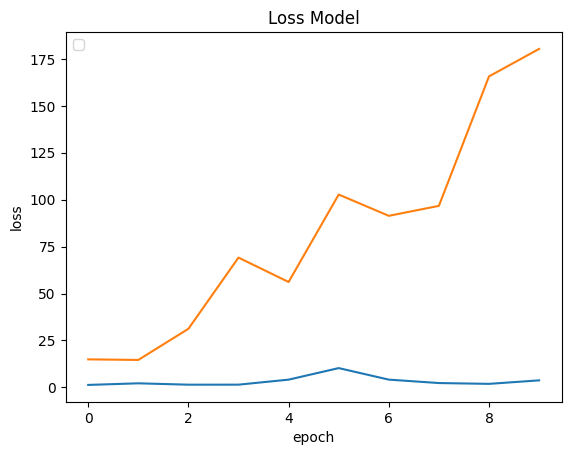

In [24]:
# Plot Loss Accuracy
import matplotlib.pyplot as plt

plt.title('Loss Model')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

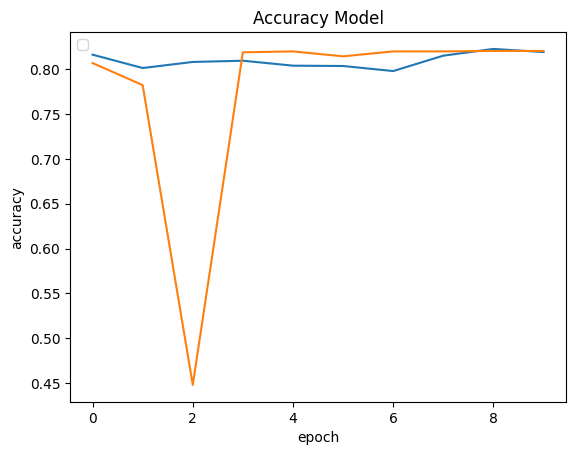

In [25]:
# Plot Accuracy

plt.title('Accuracy Model')
plt.legend(['train', 'test'], loc='upper left')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()